In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis, shapiro

%matplotlib inline

### Load dataset of Spain Energy Market
- check dataset
- EDA
- plots

In [26]:
df = pd.read_csv('../data/spain_energy_market.csv', low_memory=True)

In [4]:
df.head()

,datetime,id,name,geoid,geoname,value
0,2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833
1,2014-01-02 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,39.924167
2,2014-01-03 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.992083
3,2014-01-04 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.091667
4,2014-01-05 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,13.587500


In [5]:
df.tail()

,datetime,id,name,geoid,geoname,value
40207,2018-12-27 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,8838.0
40208,2018-12-28 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,8738.8
40209,2018-12-29 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,9020.0
40210,2018-12-30 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,8466.2
40211,2018-12-31 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,10764.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  40212 non-null  object 
 1   id        40212 non-null  int64  
 2   name      34734 non-null  object 
 3   geoid     10956 non-null  float64
 4   geoname   10956 non-null  object 
 5   value     40212 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ MB


In [54]:
df = df.astype(
    {
        'geoname': 'category',
        'name': 'category',
    }
)

In [56]:
df['datetime'] = pd.to_datetime(df.datetime)

In [32]:
mapper = {
    "Demanda programada PBF total": "Schedulled Total Demand(MWh)",
    "Demanda real": "Actual demanded power(MW)",
    "Energía asignada en Mercado SPOT Diario España": "Energy traded in daily spot Spanish market(MWh)",
    "Energía asignada en Mercado SPOT Diario Francia": "Energy traded in daily spot French market(MWh)",
    "Generación programada PBF Carbón": "Schedulled Coal electricity generation(MWh)",
    "Generación programada PBF Ciclo combinado": "Schedulled Combined Cycle electricity generation(MWh)",
    "Generación programada PBF Eólica": "Schedulled Wind electricity generation(MWh)",
    "Generación programada PBF Gas Natural Cogeneración": "Schedulled Natural Gas electricity Co-generation(MWh)",
    "Generación programada PBF Nuclear": "Schedulled Nuclear electricity generation(MWh)",
    "Generación programada PBF Solar fotovoltaica": "Schedulled Photovoltaic electricity generation(MWh)",
    "Generación programada PBF Turbinación bombeo": "Schedulled Reversible-Hydro electricity generation(MWh)",
    "Generación programada PBF UGH + no UGH": "Schedulled Total Hydro electricity generation(MWh)",
    "Generación programada PBF total": "Schedulled Total electricity generation(MWh)",
    "Precio mercado SPOT Diario ESP": "Daily spot Spain market price(€/MWh)",
    "Precio mercado SPOT Diario FRA": "Daily spot France market price(€/MWh)",
    "Precio mercado SPOT Diario POR": "Daily spot Portugal market price(€/MWh)",
    "Rentas de congestión mecanismos implícitos diario Francia exportación": "Daily spot export from France price(€/MWh)",
    "Rentas de congestión mecanismos implícitos diario Francia importación": "Daily spot import to France price(€/MWh)",
    "Rentas de congestión mecanismos implícitos diario Portugal exportación": "Daily spot export from Portugal price(€/MWh)",
    "Rentas de congestión mecanismos implícitos diario Portugal importación": "Daily spot import to Portugal price(€/MWh)"
}

In [33]:
df.replace({'name': mapper}, inplace=True)

In [69]:
df['doy'] = df['datetime'].dt.day_of_year
df['dow'] = df['datetime'].dt.day_of_week
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['qoy'] = df['datetime'].dt.quarter

In [75]:
df.set_index('datetime', inplace=True)

In [93]:
df

,id,name,geoid,geoname,value,doy,dow,month,year,qoy
datetime,,,,,,,,,,
2014-01-01 23:00:00,600,Daily spot Spain market price(€/MWh),3.0,España,25.280833,1,2,1,2014,1
2014-01-02 23:00:00,600,Daily spot Spain market price(€/MWh),3.0,España,39.924167,2,3,1,2014,1
2014-01-03 23:00:00,600,Daily spot Spain market price(€/MWh),3.0,España,4.992083,3,4,1,2014,1
2014-01-04 23:00:00,600,Daily spot Spain market price(€/MWh),3.0,España,4.091667,4,5,1,2014,1
2014-01-05 23:00:00,600,Daily spot Spain market price(€/MWh),3.0,España,13.587500,5,6,1,2014,1
...,...,...,...,...,...,...,...,...,...,...
2018-12-27 23:00:00,3,Schedulled Reversible-Hydro electricity genera...,NaN,NaN,8838.000000,361,3,12,2018,4
2018-12-28 23:00:00,3,Schedulled Reversible-Hydro electricity genera...,NaN,NaN,8738.800000,362,4,12,2018,4
2018-12-29 23:00:00,3,Schedulled Reversible-Hydro electricity genera...,NaN,NaN,9020.000000,363,5,12,2018,4


In [82]:
df['value'].describe()

count    4.021200e+04
mean     1.325967e+05
std      2.147129e+05
min     -1.426133e+06
25%      5.112708e+01
50%      2.778778e+04
75%      1.615399e+05
max      2.584390e+06
Name: value, dtype: float64

In [ ]:
mean = np.mean(df.values)
std = np.std(df.values)
skew = skew(df.values)
ex_kurt = kurtosis(df.values)
print("Skewness: {} \nKurtosis: {}".format(skew, ex_kurt+3))

In [ ]:
def shapiro_test(data, alpha=0.05):
    stat, pval = shapiro(data)
    print("H0: Data was drawn from a Normal Ditribution")
    if (pval<alpha):
        print("pval {} is lower than significance level: {}, therefore null hypothesis is rejected".format(pval, alpha))
    else:
        print("pval {} is higher than significance level: {}, therefore null hypothesis cannot be rejected".format(pval, alpha))

shapiro_test(data.energy, alpha=0.05)

In [ ]:
sns.distplot(df.value)
plt.title("Target Analysis")
plt.xticks(rotation=45)
plt.xlabel("(MWh)")
plt.axvline(x=mean, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean))
plt.axvline(x=mean + 2 * std, color='orange', linestyle='-')
plt.axvline(x=mean - 2 * std, color='orange', linestyle='-')
plt.show()

<Axes: xlabel='datetime'>

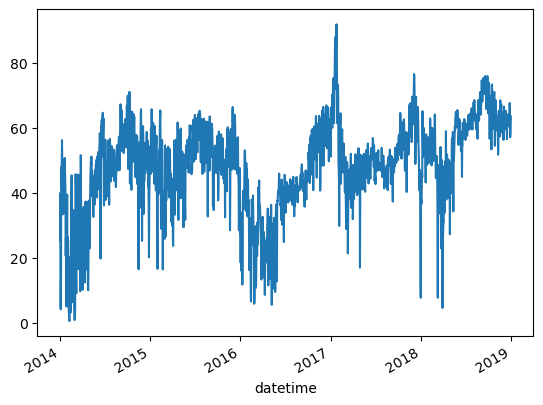

In [92]:
df.query('geoname == "España"')['value'].plot()

<Axes: xlabel='year', ylabel='value'>

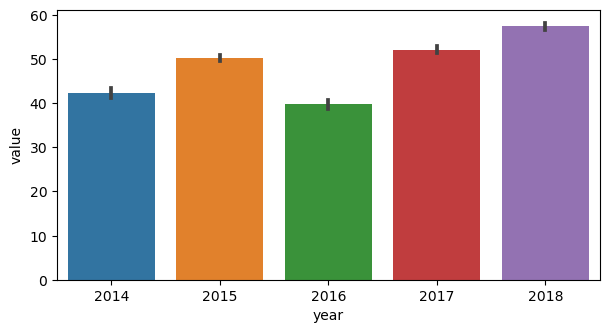

In [89]:
plt.figure(figsize=(7, 3.5))
sns.barplot(
    data = df.query('geoname == "España"'),
    x='year', y='value'
)